**Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

In [ ]:
# Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


# Data Overview

In [ ]:
# --- Load dataset ---
df = pd.read_csv('marketing_campaign_data.csv')
df.head(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,...,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,34,...,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,32,...,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

# Feature Engineering

In [ ]:
# === 1. Hitung total pengeluaran customer ===
df['Total_Spend'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# === 2. Hitung total pembelian di semua channel ===
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases',
                            'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# === 3. Hitung total campaign yang pernah diterima ===
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2',
                                     'AcceptedCmp3', 'AcceptedCmp4',
                                     'AcceptedCmp5', 'Response']].sum(axis=1)

# === 4. Hitung umur customer ===
df['Age'] = 2025 - df['Year_Birth']

# === 5. Kelompokkan umur ke dalam kategori ===
bins = [25, 35, 45, 55, 65, 100]
labels = ["Young Adult (25-34)", "Adult (35-44)", "Middle-Age (45-54)", "Senior (55-64)", "Elder (65+)"]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# === 6. Total Kids ===
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

# === 7. Kategorikan income menjadi 4 kuartil ===
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# === 8. Buat metrik perilaku online ===
df['Online_Purchase_Ratio'] = df['NumWebPurchases'] / (df['Total_Purchases'] + 1)
df['Avg_Spend_per_Purchase'] = df['Total_Spend'] / (df['Total_Purchases'] + 1)

# === 9. Conversion Rate = Response / Web Visits ===
df['Conversion_Rate_Web'] = df['Response'] / (df['NumWebVisitsMonth'] + 1e-6)

1. Total_Spend
→ Menjumlahkan seluruh pengeluaran pelanggan dari berbagai kategori produk (Coke, Fruits, Meat, Fish, Sweet, Gold).
✅ Tujuan: mengetahui total uang yang dihabiskan setiap pelanggan.

2. Total_Purchases
→ Menghitung total pembelian di semua channel (diskon, web, katalog, toko).
✅ Tujuan: melihat seberapa aktif pelanggan berbelanja.

3. Total_Campaigns_Accepted
→ Menghitung berapa banyak kampanye/promosi yang pernah diterima pelanggan.
✅ Tujuan: mengukur respons pelanggan terhadap promosi.

4. Age
→ Menghitung umur pelanggan dari tahun lahir (2025 - Year_Birth).
✅ Tujuan: digunakan untuk segmentasi berdasarkan usia.

5. Age_Group
→ Mengelompokkan umur ke dalam kategori (Young Adult, Adult, Middle-Age, dll).
✅ Tujuan: mempermudah analisis demografi dan perilaku per kelompok umur.

6. Total_Kids
→ Menjumlahkan anak kecil (Kidhome) dan remaja (Teenhome) di rumah.
✅ Tujuan: mengetahui tanggungan keluarga yang bisa mempengaruhi pola belanja.

7. Income_Group
→ Mengelompokkan pendapatan ke dalam 4 kuartil: Low, Medium, High, Very High.
✅ Tujuan: segmentasi pelanggan berdasarkan kemampuan finansial.

8. Online_Purchase_Ratio
→ Mengukur proporsi pembelian online dibanding total pembelian.
✅ Tujuan: melihat apakah pelanggan lebih aktif secara digital atau offline.

9. Avg_Spend_per_Purchase
→ Menghitung rata-rata pengeluaran per transaksi.
✅ Tujuan: mengetahui nilai rata-rata belanja tiap kali pelanggan membeli.

10. Conversion_Rate_Web
→ Menghitung rasio antara respons kampanye dengan jumlah kunjungan web. Mengukur responsiveness individual setiap customer terhadap campaign.
✅ Tujuan: melihat efektivitas website dalam mengubah pengunjung jadi pembeli.

# Univariate & Multivariate Analysis

## Distribution of Age Group

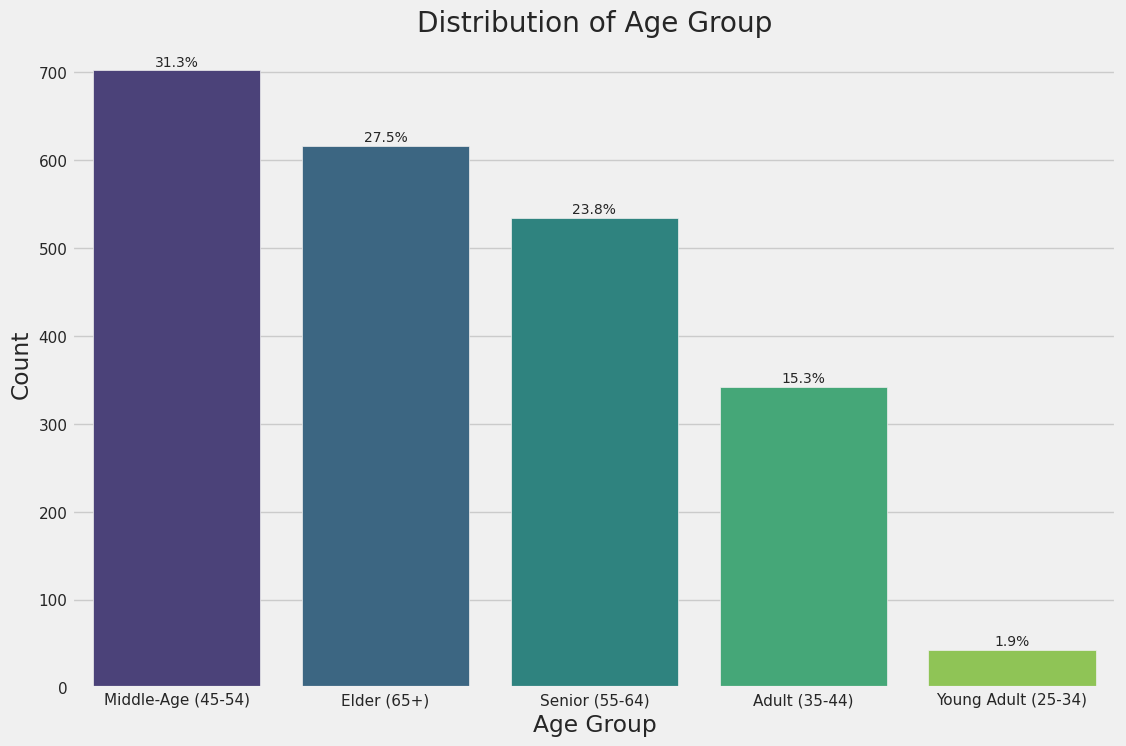

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x='Age_Group', palette='viridis', order=df['Age_Group'].value_counts().index)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+5, f'{100*height/total:.1f}%', ha='center', fontsize=10)
plt.title('Distribution of Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.show()

📊 Interpretasi Grafik: Distribution of Age Group

1. Mayoritas pelanggan berada pada kelompok usia menengah ke atas (≥45 tahun):

- Middle-Age (45–54) mendominasi dengan 31.3% dari total pelanggan.

- Elder (65+) juga besar dengan 27.5%, diikuti oleh Senior (55–64) sebesar 23.8%.

- Artinya, lebih dari 80% pelanggan adalah usia 45 tahun ke atas, yang tergolong segmen mapan dan cenderung memiliki daya beli tinggi.
<br>

2. Kelompok usia produktif (25–44 tahun) masih sangat kecil:

- Hanya sekitar 15.3% (Adult 35–44) dan 1.9% (Young Adult 25–34).

- Tidak ada representasi signifikan dari usia muda (<25 tahun).
<br>

3. Implikasi umum:

- Brand ini memiliki basis pelanggan yang lebih senior, namun berpotensi stagnan dalam pertumbuhan jangka panjang.

- Generasi muda masih underrepresented, sehingga bisa lakukan pendekatan lain dalam promosi
<br>

💼 Rekomendasi Bisnis:

1. Segmentasi dan Retensi Pelanggan Utama

- Fokuskan strategi retensi dan loyalitas pada segmen usia 45+:

- Gunakan pendekatan personalized campaign berbasis kebutuhan kenyamanan, kualitas produk, dan layanan premium.

- Promosikan program seperti member rewards, exclusive offers, atau special campaigns.

- Gunakan media komunikasi yang sesuai: email marketing, SMS campaign, atau telemarketing lebih efektif untuk segmen ini dibandingkan media sosial.
<br>

2. Perluasan Pasar ke Segmen Muda

- Kelompok 25–44 tahun punya potensi besar untuk future growth.
Strategi yang bisa diterapkan:

- Gunakan pendekatan digital marketing

- Fokus pada branding modern agar lebih menarik bagi generasi muda.
<br>

3. Optimalisasi Campaign Berdasarkan Umur

- Untuk segmen 45+, gunakan kampanye berbasis trust dan loyalty benefits.

- Untuk segmen 25–44, gunakan kampanye berbasis experience, trust dan value for money.

## Distribution of Total Campaigns Accepted

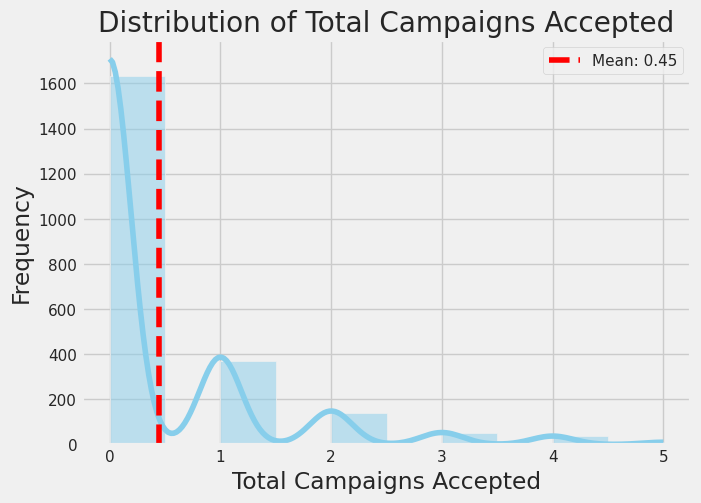

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.histplot(df['Total_Campaigns_Accepted'], bins=10, kde=True, color='skyblue')
mean_val = df['Total_Campaigns_Accepted'].mean()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.title('Distribution of Total Campaigns Accepted')
plt.xlabel('Total Campaigns Accepted')
plt.ylabel('Frequency')
plt.legend()
plt.show()


📊 Interpretasi Grafik: Distribution of Total Campaigns Accepted

1. Mayoritas pelanggan tidak menerima atau hanya menerima sedikit campaign.

- Terlihat bahwa sebagian besar data terkonsentrasi di nilai 0–1, menandakan mayoritas pelanggan menolak sebagian besar penawaran promosi.

- Rata-rata (mean) Total Campaigns Accepted ≈ 0.45, artinya secara umum setiap pelanggan hanya menerima kurang dari satu campaign dari seluruh campaign yang ditawarkan.

2. Distribusi sangat miring ke kanan (right-skewed).

- Hanya segelintir pelanggan yang menerima lebih dari 2 campaign, yang kemungkinan besar adalah loyal customers atau high spenders.

- Pola ini menunjukkan bahwa kampanye yang dijalankan selama ini belum berhasil menarik minat sebagian besar pelanggan.

3. Implikasi umum:

- Conversion dari campaign masih rendah secara keseluruhan.

- Ada potensi campaign fatigue (kelelahan terhadap promosi) atau ketidaksesuaian konten/target audiens.

- Pelanggan mungkin merasa campaign kurang relevan dengan kebutuhan atau preferensi mereka, sehingga tidak tertarik.
<br>

💼 Rekomendasi Bisnis:
1. Segmentasi Ulang Target Campaign

Gunakan data perilaku pelanggan (misalnya spending level, age group, atau channel preference) untuk mengirim campaign yang lebih personal dan relevan.

Misal:

- Pelanggan dengan high income → campaign eksklusif / luxury bundle.

- Pelanggan usia muda → diskon flash sale atau konten interaktif.
<br>


2. Optimasi Campaign Strategy

- Evaluasi content, timing, dan channel dari setiap campaign.
<br>

3. Bangun Customer Engagement Sebelum Campaign

- Tingkatkan interaksi non-promosi seperti edukasi produk, newsletter, atau konten komunitas.

- Tujuannya meningkatkan brand trust sebelum mengirim penawaran baru.
<br>

📈 Kesimpulan Insight:

Sebagian besar pelanggan tidak merespons campaign yang dikirim (rata-rata hanya 0.45 campaign diterima). Strategi campaign saat ini belum efektif — dibutuhkan resegmentasi pelanggan dan pendekatan personalisasi berbasis data agar conversion rate meningkat secara signifikan.

## Distribution of Total Purchases

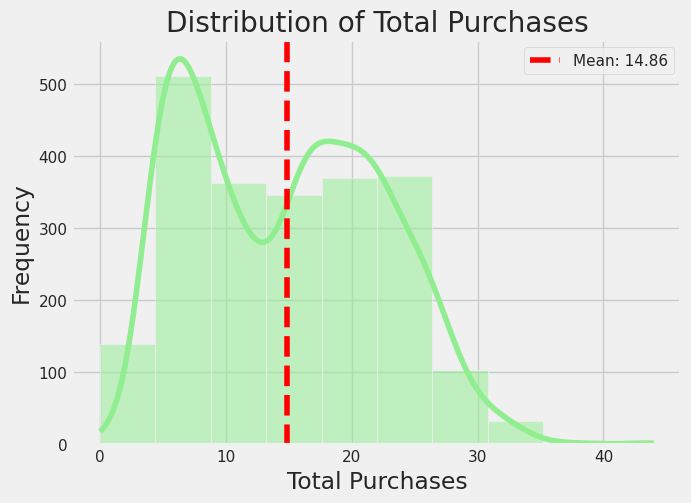

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.histplot(df['Total_Purchases'], bins=10, kde=True, color='lightgreen')
mean_val = df['Total_Purchases'].mean()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.title('Distribution of Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()


📊 Interpretasi Grafik: Distribution of Total Purchases

1. Sebagian besar pelanggan melakukan pembelian dalam jumlah rendah hingga menengah.

- Rata-rata (mean) Total Purchases ≈ 14.86 transaksi.

- Terlihat puncak distribusi (mode) berada pada kisaran 5–10 pembelian, menandakan bahwa pelanggan rata-rata tidak terlalu sering bertransaksi.

2. Distribusi agak miring ke kanan (right-skewed).

- Ada sebagian kecil pelanggan dengan jumlah pembelian yang sangat tinggi (>30 transaksi), namun jumlahnya sedikit.

- Hal ini menunjukkan adanya minoritas pelanggan dengan loyalitas tinggi/impulsif.
<br>


💼 Rekomendasi Bisnis:
1. Segmentasi Berdasarkan Frekuensi Pembelian

- Bagi pelanggan menjadi 3 kelompok:

- Low Buyers (≤10x) → butuh re-engagement campaign (misal: “welcome back” offer atau loyalty points).

- Medium Buyers (11–20x) → pertahankan engagement dengan promosi terjadwal.

- High Buyers (>20x) → beri rewards eksklusif atau membership benefits untuk menjaga loyalitas.
<br>

2. Optimasi Program Loyalty / Retention
<br>

📈 Kesimpulan Insight:

Sebagian besar pelanggan bertransaksi sekitar 10–15 kali, sementara hanya sebagian kecil yang sangat aktif.
Fokus bisnis sebaiknya diarahkan pada meningkatkan frekuensi pembelian pelanggan low-buyers dan mempertahankan pelanggan aktif dengan program loyalitas yang lebih kuat.

## Distribution Total Spend

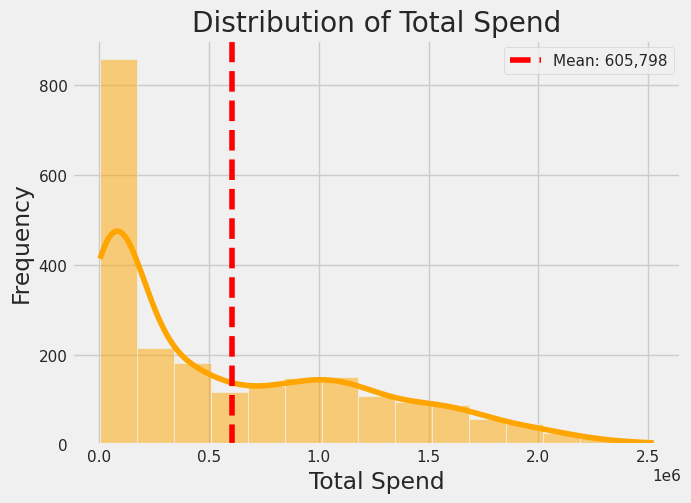

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.histplot(df['Total_Spend'], bins=15, kde=True, color='orange')
mean_val = df['Total_Spend'].mean()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:,.0f}')
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.legend()
plt.show()


📊 Interpretasi:

1. Distribusi miring ke kanan (right-skewed)
Mayoritas pelanggan memiliki total spend yang rendah, sedangkan hanya sebagian kecil pelanggan yang mengeluarkan uang sangat besar. Ini menandakan adanya kelompok pelanggan loyal yang mendorong total revenue naik.

2. Rata-rata (mean) sekitar 605.798
Garis merah menunjukkan nilai rata-rata pengeluaran pelanggan. Karena distribusi condong ke kanan, mean lebih tinggi dari median, yang berarti beberapa pelanggan dengan pengeluaran tinggi menarik rata-rata ke atas.

3. Sebagian besar pelanggan menghabiskan di bawah 500.000
Frekuensi tertinggi berada di rentang pengeluaran rendah, menunjukkan bahwa sebagian besar pelanggan masih di kategori low spender.

## Correlation Beetween Variables

<Axes: >

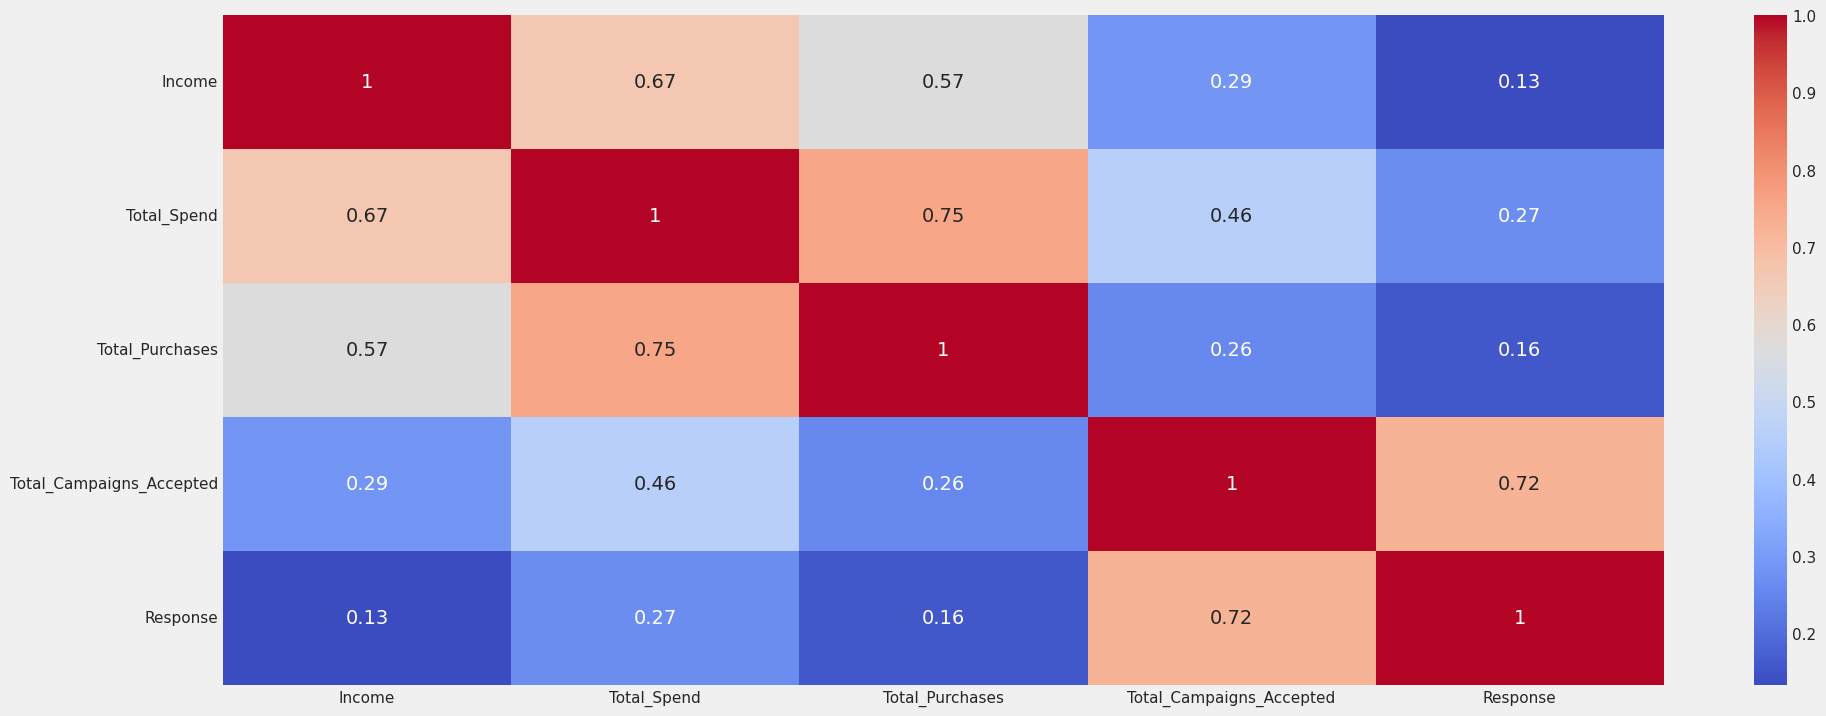

In [ ]:
corr = df[["Income", "Total_Spend", "Total_Purchases", "Total_Campaigns_Accepted", "Response"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

| Variabel                                          | Korelasi                 | Interpretasi                                                                                                                                                                                  |
| ------------------------------------------------- | ------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Income ↔ Total_Spend (0.67)**                   | **Kuat positif**         | Semakin tinggi pendapatan pelanggan, semakin besar total pengeluaran mereka. Ini logis — pelanggan berpendapatan tinggi punya daya beli lebih besar.                                          |
| **Total_Spend ↔ Total_Purchases (0.75)**          | **Sangat kuat positif**  | Pelanggan yang sering berbelanja juga cenderung menghabiskan lebih banyak uang. Ini menunjukkan *customer activity* sangat memengaruhi total revenue.                                         |
| **Income ↔ Total_Purchases (0.57)**               | **Cukup kuat positif**   | Pendapatan lebih tinggi cenderung berbanding lurus dengan frekuensi pembelian, walau tidak sekuat korelasi dengan spending. Bisa jadi pelanggan kaya lebih selektif tapi tetap rutin belanja. |
| **Total_Spend ↔ Total_Campaigns_Accepted (0.46)** | **Sedang positif**       | Pelanggan dengan pengeluaran tinggi lebih mungkin menerima campaign. Ini indikasi bahwa promosi lebih efektif pada pelanggan aktif secara finansial.                                          |
| **Total_Campaigns_Accepted ↔ Response (0.43)**    | **Sedang positif**       | Semakin sering pelanggan menerima campaign sebelumnya, semakin besar kemungkinan mereka merespons campaign baru. Artinya, *retargeting campaign* efektif.                                     |
| **Income ↔ Response (0.13)**                      | **Lemah positif**        | Pendapatan tidak terlalu memengaruhi apakah pelanggan merespons campaign. Mungkin pelanggan berpendapatan tinggi kurang tertarik pada promo harga.                                            |
| **Total_Spend ↔ Response (0.27)**                 | **Lemah–sedang positif** | Pelanggan dengan spending tinggi sedikit lebih responsif, tapi tidak dominan. Bisa jadi mereka loyal tapi tidak terlalu terpengaruh campaign.                                                 |
| **Total_Purchases ↔ Response (0.16)**             | **Lemah positif**        | Frekuensi pembelian tidak terlalu menentukan apakah pelanggan merespons campaign. Artinya, campaign belum sepenuhnya tepat sasaran pada pelanggan aktif.                                      |


🧠 Insight Utama

1. Spending dan Purchase adalah faktor paling kuat yang saling memengaruhi.
→ Fokus campaign bisa diarahkan ke pelanggan dengan frekuensi belanja tinggi untuk meningkatkan nilai transaksi.
<br>

2. Response tidak terlalu tergantung pada income.
→ Promosi tidak perlu fokus pada pelanggan kaya, tapi pada pelanggan yang engaged dengan campaign sebelumnya.
<br>

3. Retargeting bekerja efektif.
→ Korelasi 0.43 antara Total_Campaigns_Accepted dan Response menunjukkan bahwa pelanggan yang sebelumnya menerima campaign lebih mungkin merespons lagi.
<br>

4. Potensi peningkatan conversion:
Campaign bisa dioptimalkan dengan personalisasi, karena korelasi spending dan response masih rendah — artinya campaign saat ini belum cukup memotivasi pelanggan aktif untuk bertransaksi lebih banyak.
<br>

## Conversion Rate vs Other Variables

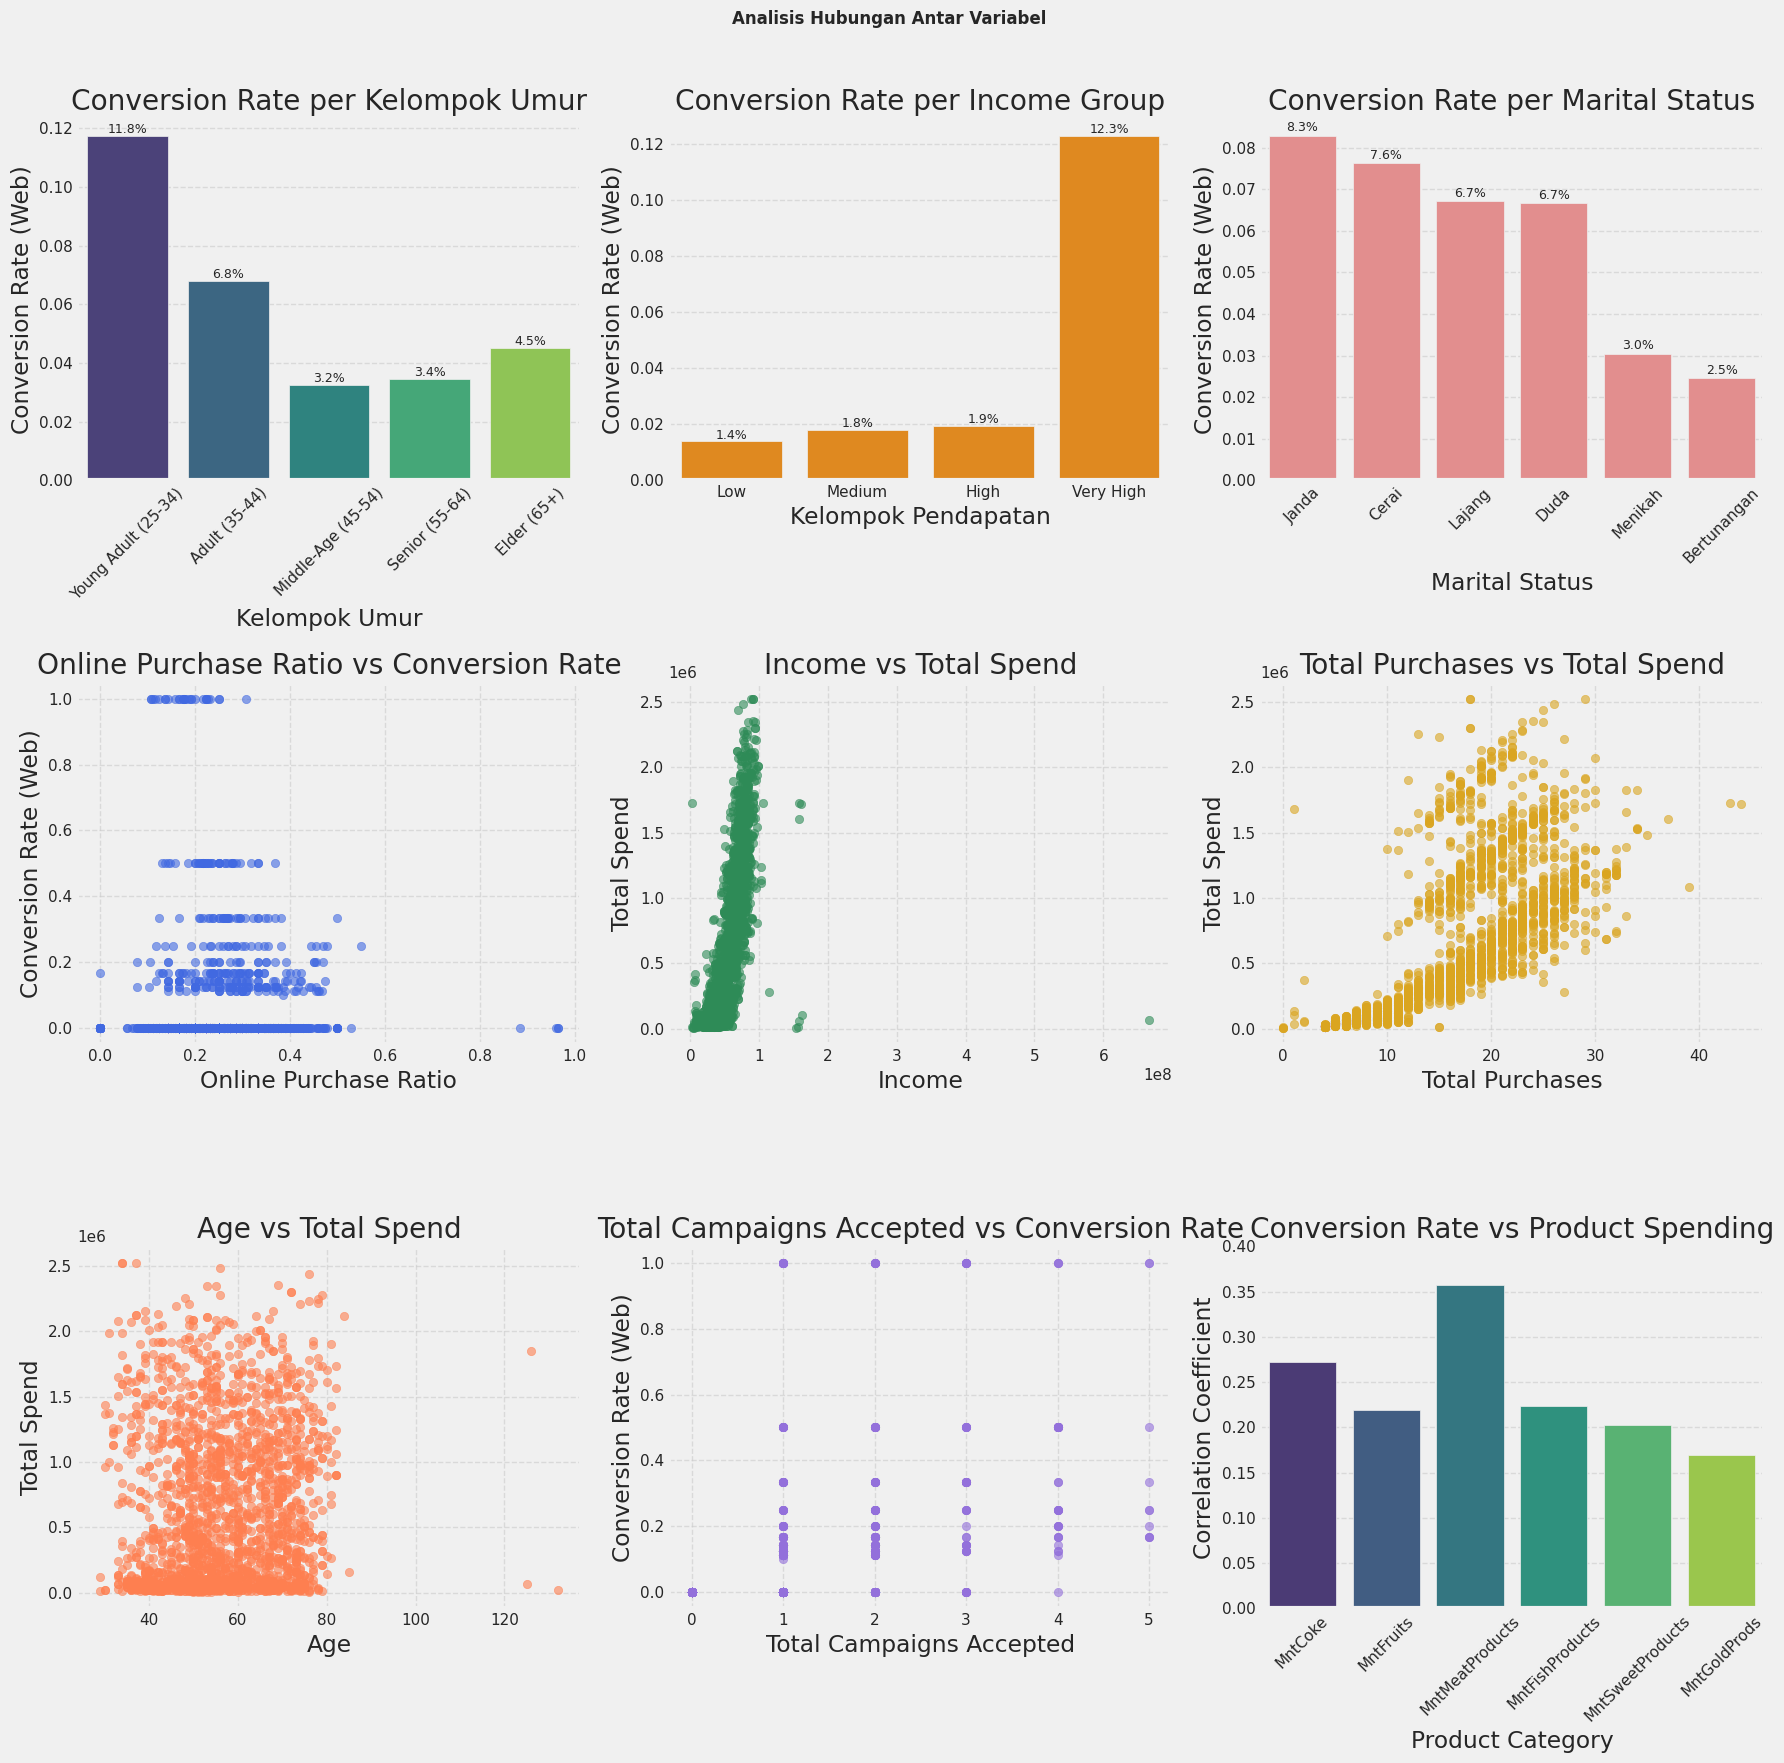

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Analisis Hubungan Antar Variabel", fontsize=12, fontweight='bold')
axes = axes.flatten()

# === 1. Age_Group vs Conversion_Rate_Web ===
group_age = df.groupby('Age_Group')['Conversion_Rate_Web'].mean().sort_index()
sns.barplot(x=group_age.index, y=group_age.values, ax=axes[0], palette='viridis')
axes[0].set_title('Conversion Rate per Kelompok Umur')
axes[0].set_xlabel('Kelompok Umur')
axes[0].set_ylabel('Conversion Rate (Web)')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(group_age.values):
    axes[0].text(i, v + 0.001, f"{v*100:.1f}%", ha='center', fontsize=9)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)


# === 2. Income_Group vs Conversion_Rate_Web ===
group_income = df.groupby('Income_Group')['Conversion_Rate_Web'].mean()
sns.barplot(x=group_income.index, y=group_income.values, ax=axes[1], color='darkorange')
axes[1].set_title('Conversion Rate per Income Group')
axes[1].set_xlabel('Kelompok Pendapatan')
axes[1].set_ylabel('Conversion Rate (Web)')
for i, v in enumerate(group_income.values):
    axes[1].text(i, v + 0.001, f"{v*100:.1f}%", ha='center', fontsize=9)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)


# === 3. Marital_Status vs Conversion_Rate_Web ===
group_marital = df.groupby('Marital_Status')['Conversion_Rate_Web'].mean().sort_values(ascending=False)
sns.barplot(x=group_marital.index, y=group_marital.values, ax=axes[2], color='lightcoral')
axes[2].set_title('Conversion Rate per Marital Status')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Conversion Rate (Web)')
axes[2].tick_params(axis='x', rotation=45) # Removed ha='right'
for i, v in enumerate(group_marital.values):
    axes[2].text(i, v + 0.001, f"{v*100:.1f}%", ha='center', fontsize=9)
axes[2].grid(axis='y', linestyle='--', alpha=0.6)


# === 4. Online_Purchase_Ratio vs Conversion_Rate_Web ===
axes[3].scatter(df['Online_Purchase_Ratio'], df['Conversion_Rate_Web'], alpha=0.6, color='royalblue')
axes[3].set_title('Online Purchase Ratio vs Conversion Rate')
axes[3].set_xlabel('Online Purchase Ratio')
axes[3].set_ylabel('Conversion Rate (Web)')
axes[3].grid(True, linestyle='--', alpha=0.6)


# === 5. Total_Spend vs Income ===
axes[4].scatter(df['Income'], df['Total_Spend'], alpha=0.6, color='seagreen')
axes[4].set_title('Income vs Total Spend')
axes[4].set_xlabel('Income')
axes[4].set_ylabel('Total Spend')
axes[4].grid(True, linestyle='--', alpha=0.6)


# === 6. Total_Spend vs Total_Purchases ===
axes[5].scatter(df['Total_Purchases'], df['Total_Spend'], alpha=0.6, color='goldenrod')
axes[5].set_title('Total Purchases vs Total Spend')
axes[5].set_xlabel('Total Purchases')
axes[5].set_ylabel('Total Spend')
axes[5].grid(True, linestyle='--', alpha=0.6)


# === 7. Age vs Total_Spend ===
axes[6].scatter(df['Age'], df['Total_Spend'], alpha=0.6, color='coral')
axes[6].set_title('Age vs Total Spend')
axes[6].set_xlabel('Age')
axes[6].set_ylabel('Total Spend')
axes[6].grid(True, linestyle='--', alpha=0.6)


# === 8. Total_Campaigns_Accepted vs Conversion_Rate_Web ===
axes[7].scatter(df['Total_Campaigns_Accepted'], df['Conversion_Rate_Web'], alpha=0.6, color='mediumpurple')
axes[7].set_title('Total Campaigns Accepted vs Conversion Rate')
axes[7].set_xlabel('Total Campaigns Accepted')
axes[7].set_ylabel('Conversion Rate (Web)')
axes[7].grid(True, linestyle='--', alpha=0.6)

# === 9. Correlation between Conversion Rate and Product Spending ===
mnt_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
correlation_with_conversion = df[mnt_cols + ['Conversion_Rate_Web']].corr()['Conversion_Rate_Web'].drop('Conversion_Rate_Web')
sns.barplot(x=correlation_with_conversion.index, y=correlation_with_conversion.values, palette='viridis', ax=axes[8])
axes[8].set_title('Conversion Rate vs Product Spending')
axes[8].set_xlabel('Product Category')
axes[8].set_ylabel('Correlation Coefficient')
axes[8].tick_params(axis='x', rotation=45) # Removed ha='right'
axes[8].set_ylim(0, 0.4) # Set a reasonable y-limit
axes[8].grid(axis='y', linestyle='--', alpha=0.6)


# Hapus subplot yang tidak terpakai jika ada (karena sekarang 9 subplot)
if len(axes) > 9:
    for j in range(9, len(axes)):
        fig.delaxes(axes[j])


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

1. Conversion Rate per Kelompok Umur

- Temuan: Kelompok usia 25–34 tahun memiliki conversion rate tertinggi (11.8%), lalu turun drastis di kelompok yang lebih tua.

- Interpretasi: Generasi muda (GenZ - millennial awal) paling responsif terhadap campaign digital.

🛒 Rekomendasi: Campaign online pada segmen 25–34, misalnya dengan strategi promosi personalisasi digital & konten interaktif (social media ads, influencer marketing).
<br>


2. Conversion Rate per Kelompok Pendapatan

- Temuan: Kategori “Very High Income” mendominasi dengan conversion rate 12.9%, jauh di atas kelompok lain.

- Interpretasi: Semakin tinggi pendapatan, semakin besar kemungkinan mereka membeli setelah menerima campaign.

🛒 Rekomendasi:

- Buat premium-tier campaign (loyalty, exclusive access, bundle offers).

- Gunakan segmentasi harga menengah–atas agar relevan dengan daya beli mereka.
<br>


3. Berdasarkan Status Pernikahan

- Temuan: Pelanggan janda/cerai/lajang menunjukkan tingkat konversi lebih tinggi (6–8%) dibanding menikah/bertunangan (<3%).

- Interpretasi: Pelanggan single lebih impulsif atau lebih mandiri dalam keputusan pembelian.

🛒 Rekomendasi:

- Gunakan messaging bertema self-reward, independence, atau self-care.

- Campaign “Treat Yourself” cocok untuk segmen ini.
<br>

4. Online Purchase Ratio vs Conversion Rate

- Temuan: Hubungan positif lemah, tapi terlihat tren bahwa semakin sering berbelanja online → conversion rate meningkat.

- Rekomendasi: Dorong pelanggan offline untuk mencoba kanal online lewat promo first online purchase.
<br>

5. Income vs Total Spend

- Temuan: Korelasi positif kuat — semakin tinggi income, semakin tinggi total spending.

🛒 Rekomendasi:

- Segmentasi high-income perlu dipertahankan (mereka kontributor utama revenue).

- Implementasikan VIP or loyalty program untuk mempertahankan mereka.
<br>

6. Total Purchases vs Total Spend

- Temuan: Semakin sering bertransaksi → total spending meningkat signifikan.

🛒 Rekomendasi:

- Perkuat cross-sell dan upsell strategy.

- Beri insentif untuk pembelian berulang (contoh: point reward, diskon pembelian ke-3 dst).
<br>

7. Age vs Total Spend

- Temuan: Tidak ada pola korelasi kuat — spending tersebar di semua umur.

🛒 Rekomendasi:

- Gunakan behavioral segmentation (frekuensi belanja, produk favorit) daripada usia murni.
<br>

8. Total Campaigns Accepted vs Conversion Rate

- Temuan: Pelanggan yang lebih sering menerima campaign sedikit lebih mungkin untuk melakukan konversi, tapi tidak terlalu signifikan.

- Interpretasi: Campaign terlalu sering bisa menimbulkan kejenuhan (diminishing return)

🛒 Rekomendasi:

- Optimalkan kualitas pesan, bukan hanya frekuensi.

- Gunakan personalized campaign berbasis preferensi dan histori belanja.
<br>


9. Conversion vs Barang

- Pelanggan lebih banyak membeli produk daging
<br>

🎯 Kesimpulan Strategis

- Campaign ke usia 25–34 perlu diubah dan fokus ke income tinggi.

- Gunakan personalized digital marketing untuk meningkatkan engagement dan conversion.

- Bangun loyalty system untuk pembeli berulang dan pelanggan premium.

- Evaluasi frekuensi campaign agar tidak overexposed.

# Data Cleaning & Data Pre-Processing

## Missing Value

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0


In [ ]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0


In [ ]:
df['Age_Group'].fillna(df['Age_Group'].mode()[0], inplace=True)
df['Income_Group'].fillna(df['Income_Group'].mode()[0], inplace=True) #pake modus soalnya kategorikal dan jaga distribusi asli sebisa mungkin

# Cek ulang
print(df.isnull().sum())

# CEK UNIK VALUE SETELAH IMPUTASI ===
print(df['Age_Group'].value_counts())
print(df['Income_Group'].value_counts())


Unnamed: 0                  0
ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Total_Spend                 0
Total_Purchases             0
Total_Campaigns_Accepted    0
Age       

## Handling Duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

## Drop Data

In [ ]:
df.drop(['ID', 'Unnamed: 0', 'Z_CostContact', 'Z_Revenue',
         'Dt_Customer', 'Response', 'Complain'], axis=1, inplace=True, errors='ignore')

In [ ]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df['Total_Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)
df.drop(campaign_cols, axis=1, inplace=True) #redundant dengan kolom Total_Campaigns_Accepted

## Feature Encoding

In [ ]:
# Kolom untuk one-hot encoding
categorical_cols = ['Education', 'Marital_Status', 'Age_Group', 'Income_Group']

In [ ]:
# Kolom untuk standardization
numerical_cols = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Total_Spend', 'Total_Purchases',
    'Total_Campaigns_Accepted', 'Age', 'Total_Kids',
    'Online_Purchase_Ratio', 'Avg_Spend_per_Purchase', 'Conversion_Rate_Web'
]

## Pre-Processing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply preprocessing
feature_cols = numerical_cols + categorical_cols
X = df[feature_cols]

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
cat_encoder = preprocessor.named_transformers_['cat']
numerical_features = numerical_cols
categorical_features = cat_encoder.get_feature_names_out(categorical_cols)

# Gabungkan nama fitur numerik dan kategorikal
all_feature_names = list(numerical_features) + list(categorical_features)

# Create processed DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

print("Shape sebelum preprocessing:", X.shape)
print("Shape setelah preprocessing:", X_processed_df.shape)
print("\n5 sample data setelah preprocessing:")
display(X_processed_df.head())

print("\nKolom setelah one-hot encoding:")
for col in categorical_features:
    print(f"- {col}")

print(f"\nTotal fitur setelah preprocessing: {len(all_feature_names)}")

Shape sebelum preprocessing: (2240, 28)
Shape setelah preprocessing: (2240, 40)

5 sample data setelah preprocessing:


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Elder (65+),Age_Group_Middle-Age (45-54),Age_Group_Senior (55-64),Age_Group_Young Adult (25-34),Income_Group_Low,Income_Group_Medium,Income_Group_Very High
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Kolom setelah one-hot encoding:
- Education_S1
- Education_S2
- Education_S3
- Education_SMA
- Marital_Status_Cerai
- Marital_Status_Duda
- Marital_Status_Janda
- Marital_Status_Lajang
- Marital_Status_Menikah
- Age_Group_Elder (65+)
- Age_Group_Middle-Age (45-54)
- Age_Group_Senior (55-64)
- Age_Group_Young Adult (25-34)
- Income_Group_Low
- Income_Group_Medium
- Income_Group_Very High

Total fitur setelah preprocessing: 40


# Data Modeling

## Persiapan Data Clustering

In [ ]:
X_clustering = X_processed_df.copy()

print("Data untuk clustering:")
print(f"Shape: {X_clustering.shape}")
print(f"Features: {X_clustering.columns.tolist()[:10]}...")

Data untuk clustering:
Shape: (2240, 40)
Features: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']...


## Elbow Method & Silhouette Score

Menghitung WCSS dan Silhouette Score untuk berbagai jumlah cluster...
Cluster 2: WCSS = 42917.92, Silhouette Score = 0.2731
Cluster 3: WCSS = 38165.59, Silhouette Score = 0.2009
Cluster 4: WCSS = 35850.39, Silhouette Score = 0.1365
Cluster 5: WCSS = 34044.10, Silhouette Score = 0.1391
Cluster 6: WCSS = 32788.66, Silhouette Score = 0.1348
Cluster 7: WCSS = 31750.04, Silhouette Score = 0.1304
Cluster 8: WCSS = 30836.60, Silhouette Score = 0.1289
Cluster 9: WCSS = 30086.13, Silhouette Score = 0.1313
Cluster 10: WCSS = 29323.77, Silhouette Score = 0.1314


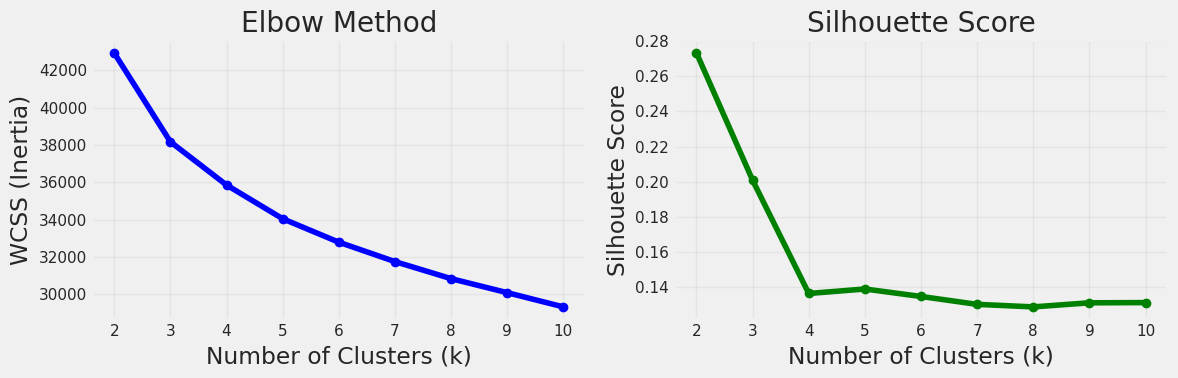


Optimal cluster based on Silhouette Score: 2, Silhouette Score: 0.273


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

wcss, sil_scores = [], []
K = range(2, 11)

# Gunakan data yang sudah dipreprocessing (X_processed_df)
# Pastikan X_processed_df sudah tersedia dari langkah preprocessing sebelumnya
if 'X_processed_df' not in locals():
    print("Error: X_processed_df not found. Please run the preprocessing steps first.")
else:
    # Gunakan X_processed_df untuk clustering
    data_for_clustering = X_processed_df.copy()

    print("Menghitung WCSS dan Silhouette Score untuk berbagai jumlah cluster...")
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        # Lakukan fit_predict pada data yang sudah diproses
        labels = kmeans.fit_predict(data_for_clustering)
        wcss.append(kmeans.inertia_)
        # Hitung silhouette score pada data yang sudah diproses dan label cluster
        sil_scores.append(silhouette_score(data_for_clustering, labels))
        print(f"Cluster {k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {sil_scores[-1]:.4f}")


    # Plot hasil
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(K, wcss, 'o-', color='blue')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)'); plt.ylabel('WCSS (Inertia)')
    plt.grid(True, alpha=0.3)

    plt.subplot(1,2,2)
    plt.plot(K, sil_scores, 'o-', color='green')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (k)'); plt.ylabel('Silhouette Score')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Tentukan cluster optimal (berdasarkan nilai silhouette tertinggi)
    if sil_scores: # Check if sil_scores is not empty
        best_k_silhouette = K[np.argmax(sil_scores)]
        print(f"\nOptimal cluster based on Silhouette Score: {best_k_silhouette}, Silhouette Score: {max(sil_scores):.3f}")
    else:
        print("\nCould not determine optimal cluster as silhouette scores were not computed.")

## Final K-Means

In [ ]:
if 'X_processed_df' not in locals():
    print("Error: X_processed_df not found. Please run the preprocessing steps first.")
else:
    # Gunakan data yang sudah dipreprocessing untuk K-Means
    X_data_for_kmeans = X_processed_df.copy()


    best_k = 3


    print(f"Running K-Means with {best_k} clusters...")

    # Inisialisasi dan latih model K-Means
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)

    # Lakukan fit_predict pada data yang sudah diproses
    cluster_labels = kmeans.fit_predict(X_data_for_kmeans)

    if 'df' in locals():
        df_with_clusters = df.copy()
        df_with_clusters['Cluster'] = cluster_labels
        print("\nCluster labels added to df_with_clusters.")
        print(df_with_clusters['Cluster'].value_counts())
        print("\nFirst 5 rows of df_with_clusters:")
        display(df_with_clusters.head(5))
    else:
        print("Error: Original DataFrame 'df' not found. Cannot add cluster labels.")

Running K-Means with 3 clusters...

Cluster labels added to df_with_clusters.
Cluster
2    1031
0     662
1     547
Name: count, dtype: int64

First 5 rows of df_with_clusters:


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Total_Purchases,Total_Campaigns_Accepted,Age,Age_Group,Total_Kids,Income_Group,Online_Purchase_Ratio,Avg_Spend_per_Purchase,Conversion_Rate_Web,Cluster
0,1957,S1,Lajang,58138000.0,0,0,58,635000,88000,546000,...,25,0,68,Elder (65+),0,High,0.307692,62192.307692,0.142857,1
1,1954,S1,Lajang,46344000.0,1,1,38,11000,1000,6000,...,6,0,71,Elder (65+),2,Medium,0.142857,3857.142857,0.000000,2
2,1965,S1,Bertunangan,71613000.0,0,0,26,426000,49000,127000,...,21,0,60,Senior (55-64),0,Very High,0.363636,35272.727273,0.000000,0
3,1984,S1,Bertunangan,26646000.0,1,0,26,11000,4000,20000,...,8,0,41,Adult (35-44),1,Low,0.222222,5888.888889,0.000000,2
4,1981,S3,Menikah,58293000.0,1,0,94,173000,43000,118000,...,19,0,44,Adult (35-44),1,High,0.250000,21100.000000,0.000000,0


## PCA

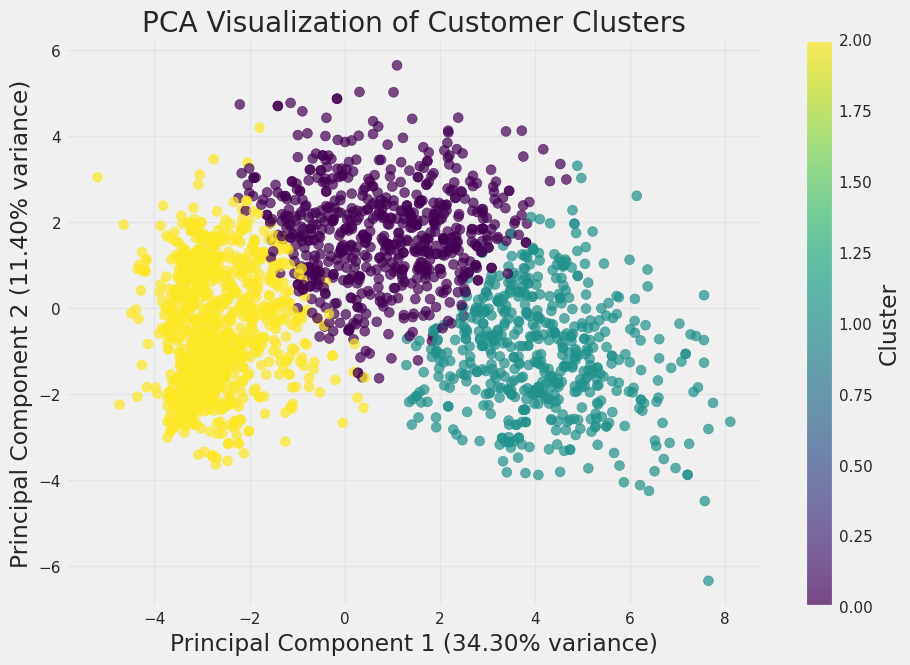

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

if 'X_processed_df' in locals() and 'df_with_clusters' in locals():
    # Lakukan PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_processed_df)

    # Buat DataFrame untuk plot
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = df_with_clusters['Cluster'] # Ambil label cluster

    # Plot hasil PCA
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7, s=50)
    plt.title('PCA Visualization of Customer Clusters')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Error: Data yang diperlukan (X_processed_df dan df_with_clusters) belum tersedia.")

In [ ]:
# Analisis karakteristik setiap cluster untuk semua fitur numerik
cluster_analysis_full = df_with_clusters.groupby('Cluster')[numerical_cols].agg(['mean', 'std'])

print("\nKarakteristik Setiap Cluster (Mean dan Std) untuk semua fitur numerik:")
display(cluster_analysis_full)

# Analisis karakteristik setiap cluster untuk fitur kategorikal (menggunakan value_counts)
print("\nDistribusi Fitur Kategorikal per Cluster:")
for col in categorical_cols:
    print(f"\nDistribusi '{col}' per Cluster:")
    display(pd.crosstab(df_with_clusters['Cluster'], df_with_clusters[col], normalize='index'))


Karakteristik Setiap Cluster (Mean dan Std) untuk semua fitur numerik:


Year_Birth                   Income                 Kidhome  \
                mean        std          mean           std      mean   
Cluster                                                                 
0        1964.308157   9.972666  5.813313e+07  1.116488e+07  0.234139   
1        1968.824497  13.663348  7.764118e+07  2.791153e+07  0.034735   
2        1971.683802  11.318810  3.497498e+07  1.436758e+07  0.796314   

                   Teenhome              Recency             ...        Age  \
              std      mean       std       mean        std  ...       mean   
Cluster                                                      ...              
0        0.448073  0.912387  0.438189  47.935045  28.463694  ...  60.691843   
1        0.183275  0.127971  0.339796  49.861060  29.390183  ...  56.175503   
2        0.491901  0.446169  0.523953  49.464597  29.056665  ...  53.316198   

                   Total_Kids           Online_Purchase_Ratio            \
               std       mean       std                  mean       std   
Cluster                                                                   
0         9.972666   1.146526  0.575321              0.295115  0.099523   
1        13.663348   0.162706  0.374360              0.230956  0.084971   
2        11.318810   1.242483  0.708738              0.220965  0.083449   

        Avg_Spend_per_Purchase               Conversion_Rate_Web            
                          mean           std                mean       std  
Cluster                                                                     
0                 32809.448926  13108.408608            0.016812  0.049163  
1                 68829.324879  40068.710528            0.133885  0.258079  
2                  9615.273056   6879.809324            0.012620  0.040407  

[3 rows x 48 columns]


Distribusi Fitur Kategorikal per Cluster:

Distribusi 'Education' per Cluster:


Education,D3,S1,S2,S3,SMA
Cluster,,,,,
0,0.060423,0.487915,0.182779,0.265861,0.003021
1,0.093236,0.552102,0.144424,0.210238,0.000000
2,0.108632,0.486906,0.164888,0.189137,0.050436



Distribusi 'Marital_Status' per Cluster:


Marital_Status,Bertunangan,Cerai,Duda,Janda,Lajang,Menikah
Cluster,,,,,,
0,0.259819,0.120846,0.001511,0.040785,0.163142,0.413897
1,0.263254,0.093236,0.000000,0.045704,0.248629,0.349177
2,0.256062,0.097963,0.001940,0.024248,0.232784,0.387003



Distribusi 'Age_Group' per Cluster:


Age_Group,Young Adult (25-34),Adult (35-44),Middle-Age (45-54),Senior (55-64),Elder (65+)
Cluster,,,,,
0,0.001511,0.036254,0.270393,0.306647,0.385196
1,0.047532,0.188300,0.243144,0.202925,0.318099
2,0.015519,0.208535,0.381183,0.213385,0.181377



Distribusi 'Income_Group' per Cluster:


Income_Group,Low,Medium,High,Very High
Cluster,,,,
0,0.033233,0.229607,0.586103,0.151057
1,0.010969,0.016453,0.151737,0.820841
2,0.533463,0.381183,0.080504,0.004850


Generating boxplots for numerical features per cluster...


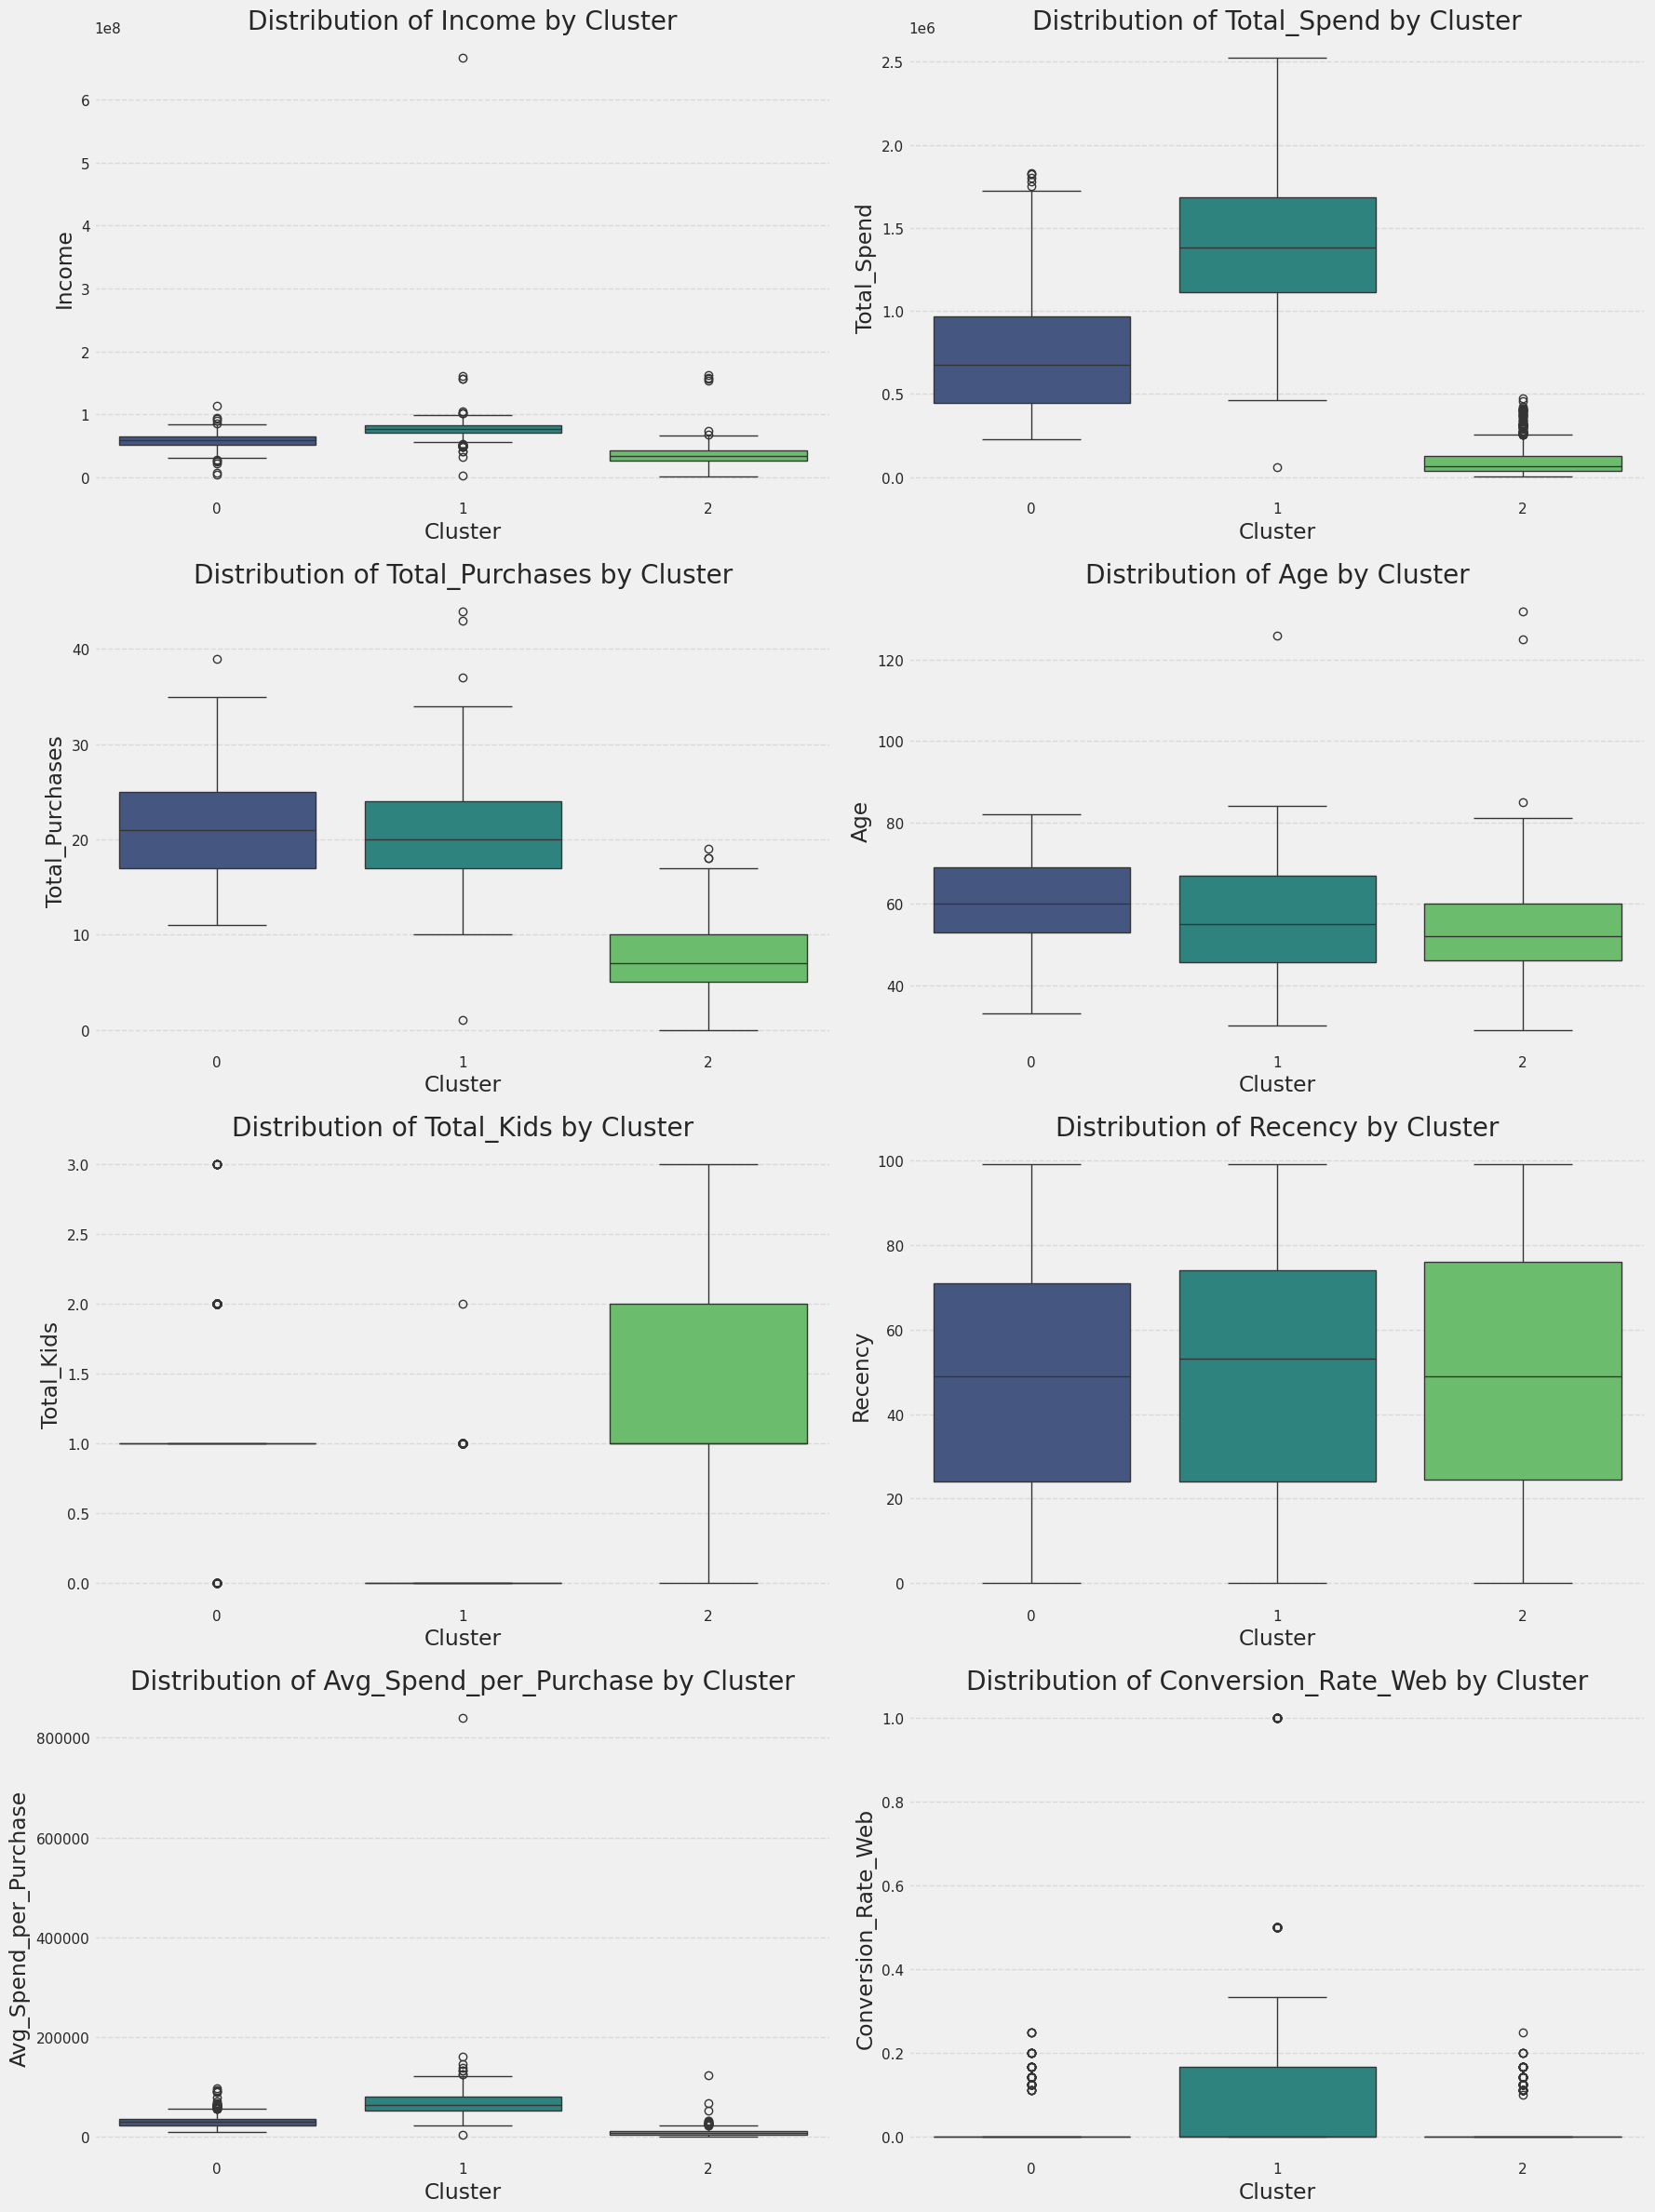

In [ ]:
# Visualisasi Fitur Numerik per Cluster (Boxplot)
# Pilih beberapa fitur numerik kunci untuk visualisasi
numerical_cols_to_plot = [
    'Income', 'Total_Spend', 'Total_Purchases', 'Age', 'Total_Kids',
    'Recency', 'Avg_Spend_per_Purchase', 'Conversion_Rate_Web'
]

# Cek apakah kolom yang dipilih ada di df_with_clusters
available_numerical_cols = [col for col in numerical_cols_to_plot if col in df_with_clusters.columns]

print("Generating boxplots for numerical features per cluster...")
n_cols = 2
n_rows = (len(available_numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(available_numerical_cols):
    sns.boxplot(x='Cluster', y=col, data=df_with_clusters, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

| Cluster | Profil                          | Engagement |   Nilai Ekonomi  | Fokus Strategi              |
| :-----: | :------------------------------ | :--------: | :--------------: | :-------------------------- |
|  **1**  | Very High-Value & Most Engaged  |  🔥 Tinggi | 💰 Sangat tinggi | Retensi & Loyalitas Premium |
|  **0**  | High-Value & Moderately Engaged |  ⚡ Sedang  |     💵 Tinggi    | Aktivasi & Retensi          |
|  **2**  | Lower-Value & Least Engaged     |  ❄️ Rendah |     💸 Rendah    | Re-engagement & Awareness   |



Generating bar plots for categorical features per cluster...


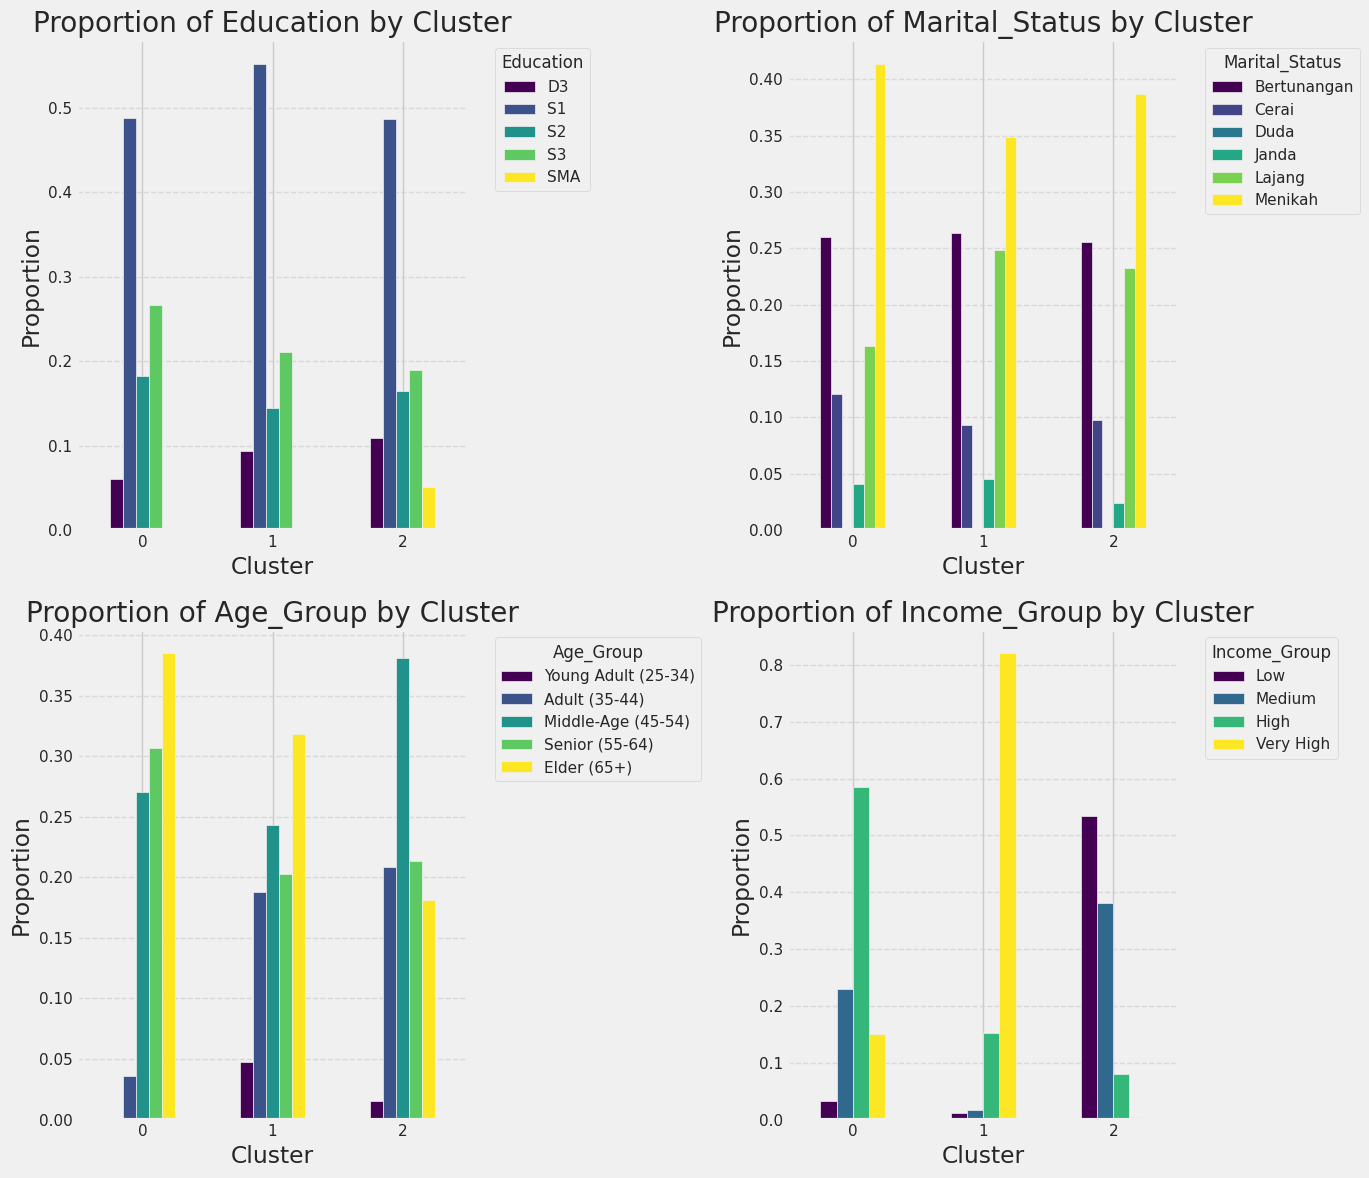

In [ ]:
# Visualisasi Fitur Kategorikal per Cluster (Bar Plot Proporsi)
# Pilih fitur kategorikal yang sudah di-encode atau yang asli jika ingin melihat proporsi
categorical_cols_to_plot = ['Education', 'Marital_Status', 'Age_Group', 'Income_Group']

print("\nGenerating bar plots for categorical features per cluster...")
n_cols = 2
n_rows = (len(categorical_cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols_to_plot):
    # Hitung proporsi per cluster
    ct = pd.crosstab(df_with_clusters['Cluster'], df_with_clusters[col], normalize='index')
    ct.plot(kind='bar', stacked=False, ax=axes[i], colormap='viridis') # Gunakan stacked=False untuk bar plot terpisah
    axes[i].set_title(f'Proportion of {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

| Cluster | Segment                    | Pendidikan | Usia  | Status         | Pendapatan | Fokus Marketing                  |
| :-----: | :------------------------- | :--------- | :---- | :------------- | :--------- | :------------------------------- |
|  **0**  | Middle-Class Family        | S1–S2      | 35–54 | Menikah        | High       | Loyalty & Family-Oriented Offers |
|  **1**  | Affluent Professionals     | S1–S3      | 35–54 | Lajang/Menikah | Very High  | Premium Targeting & Retention    |
|  **2**  | Low-Income Senior Families | SMA–D3     | 55+   | Menikah        | Low–Medium | Awareness & Discounts            |


# Kesimpulan

1. Cluster 1: "Very High-Value & Most Engaged" (547)

- Karakteristik Utama:
 Usia Adult (35-44) dan Middle Age (45-54), Pembelian, pendapatan dan pengeluaran sangat tinggi, no anak/anak sedikit, paling responsif terhadap kampanye, tingkat konversi web tinggi.

✨ Rekomendasi Bisnis:

- Retensi & Loyalitas Premium: Fokus utama adalah mempertahankan segmen ini. VIP Program, seperti contoh program poin atau tingkatan (tier) yang memberikan keuntungan eksklusif, seperti akses cashback atau diskon yang nilainya tinggi, pelanggan diprioritaskan jika ada complain atau berikan akses untuk membeli produk baru atau yang akan segera diluncurkan sebelum dirilis ke publik umum

- Komunikasi Terpersonalisasi: Email marketing yang elegan yaitu kirimkan email berisi tawaran eksklusif yang dipersonalisasi berdasarkan data pembelian mereka, misalnya rekomendasi produk yang sesuai atau promo berdasarkan kategori favorit.

- Cross-selling & Upselling Produk High-End: Tawarkan produk pelengkap bernilai tinggi berdasarkan riwayat pembelian mereka.Seperti contoh kasih rekomendasi produk sesuai pembelian pelanggan sebelumnya
<br>
<br>

2. Cluster 0: "High-Value & Moderately Engaged" (662)
* Karakteristik: Pembelian, pendapatan dan pengeluaran cukup tinggi (di bawah Cluster 1), anak sedikit, cukup responsif terhadap kampanye

✨ Rekomendasi Bisnis

- Program Loyalitas Bernilai Jelas: Promo semakin banyak beli, diskon 10% atau gratis ongkir minimum pembelanjaan Rp500.000


- Promosi Personal & Konsisten: Gunakan email dan push notification dengan jadwal rutin mingguan/bulanan. Gunakan tone “relevan & menghargai kesetiaan”, seperti "Pilihan Terbaik untuk Makan Siang-Mu', "*nama brand* kangen kamu! Belanja lagi yuk" atau "Ada rekomendasi nih buat kamu! Yuk cek segera"
<br>
<br>

3. Cluster 2: "Lower-Value & Least Engaged" (1031)

- Karakteristik Utama: Usia Senior (55-64) dan Elder (65+), Pembelian, pendapatan dan pengeluaran paling rendah, anak paling banyak, paling tidak responsif terhadap kampanye, resensi rendah.

✨ Rekomendasi Bisnis:

- Penawaran Menarik Harga & Value: Karena pendapatan lebih rendah dan anak banyak (mungkin pengeluaran rumah tangga tinggi), mereka sensitif harga. Tawarkan voucher diskon untuk pembelian dengan nilai transaksi yang rendah atau bundle hemat untuk keluarga dengan anak lebih dari 1

- Channel & Konten yang Tepat: Tingkatkan interaksi non-promosi seperti edukasi produk, newsletter, atau highlight konten komunitas, yang tujuannya meningkatkan brand trust. Keuntungannya minim biaya

- Campaign Re-engagement: Kirimkan campaign khusus untuk pelanggan yang sudah lama tidak bertransaksi (misal: "Kami Rindukan Anda" nikmati diskon spesial).

# Potential Impact

In [ ]:
# Total GMV Perusahaan
total_gmv = df['Total_Spend'].sum()
print(f"Total GMV semua customer: Rp {total_gmv:,.0f}")

Total GMV semua customer: Rp 1,356,988,000


In [ ]:
# GMV per Cluster
# Hitung GMV per cluster
if 'df_with_clusters' in locals():
    cluster_gmv = df_with_clusters.groupby('Cluster')['Total_Spend'].sum()
    print("Total Spend (GMV) per Cluster:")
    display(cluster_gmv)

    # Calculate percentage of total GMV per cluster
    total_gmv = df_with_clusters['Total_Spend'].sum()
    cluster_gmv_percentage = (cluster_gmv / total_gmv) * 100
    print("\nPercentage of Total Spend (GMV) per Cluster:")
    display(cluster_gmv_percentage)

else:
    print("Error: DataFrame 'df_with_clusters' not found. Please ensure clustering steps were executed.")

Total Spend (GMV) per Cluster:


,Total_Spend
Cluster,
0,484849000
1,773653000
2,98486000



Percentage of Total Spend (GMV) per Cluster:


,Total_Spend
Cluster,
0,35.729793
1,57.012516
2,7.257691


In [ ]:
# GMV Cluster 0 + Cluster 1
gmv_cluster_0_1 = 484849000 + 773653000
total_gmv = 1356988000

# Persentase GMV
percentage_gmv = (gmv_cluster_0_1 / total_gmv) * 100
print(f"GMV Cluster 0+1: Rp {gmv_cluster_0_1:,.0f}")
print(f"Persentase dari total GMV: {percentage_gmv:.1f}%")

GMV Cluster 0+1: Rp 1,258,502,000
Persentase dari total GMV: 92.7%


Dengan memusatkan anggaran campaign  pada Cluster 1 dan 0 (total 1.209 pelanggan atau 54% populasi), perusahaan tetap dapat menjaga hingga 92.7% total GMV, yaitu sekitar Rp 1,258,502,000.

Kemudian dikarenakan untuk Cluster 2 hanya membutuhkan minim biaya promo, memungkinkan untuk reduksi biaya promo sebesar 50%, yang berpotensi cost saving sebesar Rp 25.775.000